In [ ]:
# processes historical precipitation data from CHIRPS

In [10]:
import xarray as xr
import pandas as pd
import geopandas as gpd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
import os
import math

In [2]:
# get the centroid of the catchment in order to determine the appropriate data source
centroid = gpd.read_file('AOI/luanda_catchment_level4.shp').to_crs(epsg = 4326).centroid

C:\Users\Owner\AppData\Local\Temp\ipykernel_16880\3510852079.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gpd.read_file('AOI/luanda_catchment_level4.shp').to_crs(epsg = 4326).centroid


In [21]:
# select data source
data_folder = Path('D:/World Bank/CRP/data/CRU/tmp')  # change file path as needed

In [4]:
output_folder = Path('output')

In [17]:
first_year = 1993
last_year = 2022

In [23]:
for i in range(math.floor(first_year / 10) * 10 + 1, math.ceil(last_year / 10) * 10, 10):
    if i == 2021:
        data_file = 'cru_ts4.07.2021.2022.tmp.dat.nc'
    else:
        data_file = f'cru_ts4.07.{i}.{i+9}.tmp.dat.nc'
    
    # open data source
    nc = xr.open_dataset(data_folder / data_file)
    
    # select data based on coordinate and time period (last 30 years)
    df = nc.sel(time = slice(f'{first_year}-01-01', f'{last_year}-12-01')).sel(lon = centroid.x[0], lat = centroid.y[0], method = 'nearest')
    
    # write data to csv
    df = df.to_dataframe().drop(['lat', 'lon'], axis = 1)
    df.to_csv(output_folder / 'temperature.csv')

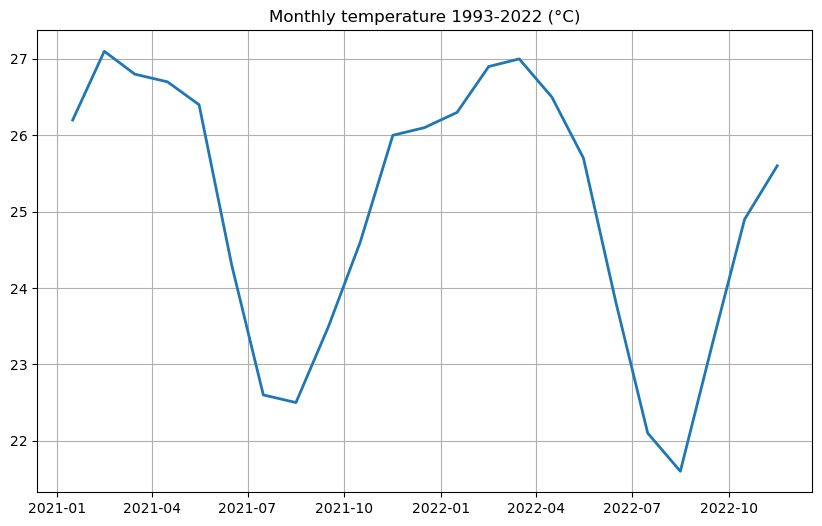

In [24]:
# plot

# Create the line chart using Seaborn with connected lines
plt.figure(figsize=(10, 6))

sns.lineplot(data=df, x='time', y='tmp', linewidth=2)

# Add labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Monthly temperature 1993-2022 (°C)')

# plt.xticks(rotation=45)
plt.grid(True)
plt.show()